<a href="https://colab.research.google.com/github/cocoisland/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/module2-polynomial-regression/Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
##### Your Code Here ##

# Prepare for X features.

#df.drop(['id'], axis=1, inplace=True)
feature_obj = df.columns.values
features=list(feature_obj)
features.remove('id')
features.remove('date')
features.remove('price')
type(features)
features



['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [0]:
# Prepare test and train data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

Y = df.price
R2_features = []
for f in features:
  X = df[f]
  X=X.values.reshape(-1,1)
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.5, random_state=42)
  model.fit(X_train, Y_train)
  Y_test_predicted = model.predict(X_test)
  R2 = r2_score(Y_test, Y_test_predicted)
  print('X={}\t\tR2={}'.format(f, R2))
  #if (R2 >= 0.2 ):
    #R2_features.append(f)
    #print('X={}\t\tR2={}'.format(f, R2))

X=bedrooms		R2=0.09177413835874848
X=bathrooms		R2=0.2727289287491844
X=sqft_living		R2=0.49226256935760826
X=sqft_lot		R2=0.006761591733626671
X=floors		R2=0.06701920603261868
X=waterfront		R2=0.07580159067320691
X=view		R2=0.15740302402072848
X=condition		R2=0.0011955408404644707
X=grade		R2=0.4309667377739639
X=sqft_above		R2=0.3702620965114556
X=sqft_basement		R2=0.10538844274155323
X=yr_built		R2=0.0020121659307126283
X=yr_renovated		R2=0.01623437758005286
X=zipcode		R2=0.002231927578955739
X=lat		R2=0.08768821444742869
X=long		R2=-0.0008202754905060061
X=sqft_living15		R2=0.3384999778053297
X=sqft_lot15		R2=0.006118702447699298


Slope Coefficient:  280.62356789744825
Intercept Value:  -43580.74309447396


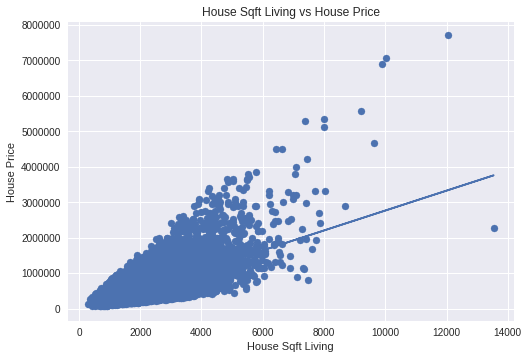

In [0]:
# Plot Bivariate regression most correlated features, sqft_living
Y=df.price
X=df.sqft_living
X=X.values.reshape(-1,1)

model.fit(X,Y)
print('Slope Coefficient: ', model.coef_[0])
print('Intercept Value: ', model.intercept_)

m_hat = model.coef_[0]
b_hat = model.intercept_

#plot all the sqft_living vs price
#plt.scatter(df[features], df.price)
plt.scatter(df.sqft_living, df.price)

#plot the best fit line
y_hat = [m_hat*x + b_hat for x in X]
plt.plot(X, y_hat)

plt.ylabel('House Price')
plt.xlabel('House Sqft Living')
plt.title('House Sqft Living vs House Price')
plt.show()

# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

Beta_i:  [   167.10832275 103065.16259903]
Beta_0: -599835.6618581187


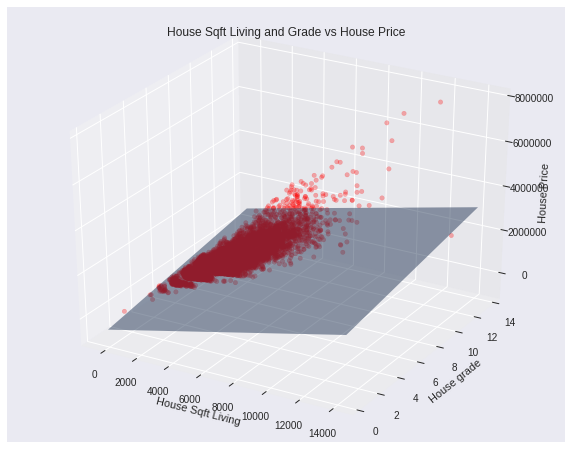

In [0]:
##### Your Code Here #####
# Plot 2 most correlated features (sqft_living, grade) vs price
from mpl_toolkits.mplot3d import Axes3D

Y=df.price
X=df[['sqft_living','grade']]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.5, random_state=42)
model.fit(X_train, Y_train)

beta_i = model.coef_
beta_0 = model.intercept_

print('Beta_i: ', beta_i)
print('Beta_0:', beta_0)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.sqft_living, df.grade, df.price, c='red', alpha=0.3)

x1 = np.array(ax.get_xlim())
y1 = np.array(ax.get_ylim())
xx, yy = np.meshgrid(x1, y1)
zz = beta_i[0]*xx + beta_i[1]*yy + beta_0

#plot the plane
plt3d = plt.gca(projection='3d')

# add Opacity to plane
plt3d.plot_surface(xx, yy, zz, alpha=0.5)

ax.set_zlabel('House Price')
ax.set_xlabel('House Sqft Living')
ax.set_ylabel('House grade')
plt.title('House Sqft Living and Grade vs House Price')
plt.show()


In [0]:
y_test_predict = model.predict(X_test)

MSE = mean_squared_error(Y_test, y_test_predict)
RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))

R2 = r2_score(Y_test, y_test_predict)
print('R^2 is {}'.format(R2))


MSE is 70544952427.10252
RMSE is 265602.9977750675
R^2 is 0.5263921128006677


# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [0]:
# All numeric X features vs price
Y = df.price
X = df[features]
#X = df[R2_features]

# Split train and test data in half
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.5, random_state=42)

# fit and predict Y
model.fit(X_train, Y_train)
y_test_predict = model.predict(X_test)

# Coefficients
beta_i = model.coef_
beta_0 = model.intercept_
print('Beta_0: ', beta_0)
print('Beta_i:]', beta_i)

print('\n')

MSE = mean_squared_error(Y_test, y_test_predict)
RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))

R2 = r2_score(Y_test, y_test_predict)
print('R^2 is {}'.format(R2))


Beta_0:  6705339.545452279
Beta_i:] [-3.41930712e+04  3.97125261e+04  9.91229817e+01  1.04057427e-01
  1.00431682e+04  5.73273418e+05  5.36941305e+04  2.47210264e+04
  9.94432289e+04  6.02382105e+01  3.88847715e+01 -2.48044346e+03
  2.12570728e+01 -5.43588580e+02  5.91178244e+05 -1.85711473e+05
  2.64961862e+01 -3.65903971e-01]


MSE is 46526645704.63182
RMSE is 215700.36092837632
R^2 is 0.6876404957050217


# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- AMES Housing Prediction Kaggle Competition: <https://www.kaggle.com/c/house-prices-advanced-regression-techniques>
- **WRITE A BLOG POST** explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)
